In [4]:
# -*- coding: utf-8 -*-
#Uses junction data obtained by normalizing each junction by its mean
#Normalizes each distribution by its maximum value

import glob
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
import matplotlib as mpl
import matplotlib.mlab as mlab
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

#ticker settings
majorLocator_x = MultipleLocator(0.01)
majorFormatter_x = FormatStrFormatter('%1.2f')
minorLocator_x = MultipleLocator(0.01)
majorLocator_y = MultipleLocator(1.5)
majorFormatter_y = FormatStrFormatter('%4.1f')
minorLocator_y = MultipleLocator(0.5)
#sets font type and size for tickers
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 8
axis_font_size = 10

## 14 days WT apico basal localization

meta NOT subset; don't know how to subset; dropped


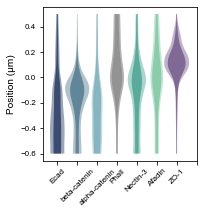

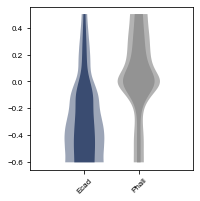

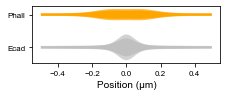

In [71]:



'''
Plotting of curves within 2 µm around the reference
'''

#subplot() command specifies numrows, numcols, fignum where fignum ranges from 1 to numrows*numcols. 
root_file = "D:\Le Bivic Lenne teams exp\\Donnees triees\\"

Phall_ZO1_TC7_load = root_file + "Actin related proteins\Phall ZO-1\TC7 14 days\AB\Intensity_measurement\Results_mean.txt"

#Phall_Ecad_TC7_load = root_file + "Actin related proteins\Phall Ecad\TC7 14 days\AB\Intensity_measurement\Results_mean.txt"
Phall_Ecad_TC7_load = root_file + r"Actin related proteins\Phall Ecad\TC7 14 days\AB\all samples\Results_mean_2.txt"

#Phall_beta_cat_TC7_load = root_file + "Actin related proteins\Phall beta-catenin\TC7 14 days\AB\Intensity_measurement\Results_mean.txt"
Phall_beta_cat_TC7_load = root_file + r"Actin related proteins\Phall beta-catenin\TC7 14 days\AB\all samples\Results_mean_2.txt"

#Phall_Afadin_TC7_load = root_file + "Actin related proteins\Phall afadin\TC7 WT 14 days\AB\Intensity_measurement\Results_mean.txt"
Phall_Afadin_TC7_load = root_file + r"Actin related proteins\Phall afadin\TC7 WT 14 days\AB\all samples\Results_mean_2.txt"

#Phall_Nectin_TC7_load = root_file + "Actin related proteins\Phall Nectin-3\TC7 WT 14 days\AB\Intensity_measurement\Results_mean.txt"
Phall_Nectin_TC7_load = root_file + r"Actin related proteins\Phall Nectin-3\TC7 WT 14 days\AB\all samples\Results_mean_2.txt"

Phall_MyoIIb_TC7_load = root_file + "Actin related proteins\Phall MyoIIb\TC7 14 days\AB\Intensity_measurement\Results_mean.txt"

Phall_Arp3_TC7_load = root_file + "Actin related proteins\Phall Arp3\TC7 14 days\AB\Intensity_measurement\Results_mean.txt"

Phall_alpha_cat_TC7_load = root_file + "\Actin related proteins\Phall alpha-catenin\TC7 14 days\AB\Intensity_measurement\Results_mean.txt"


#########

alpha = 0.06

# colors  Phall     ZO-1             Phall   Ecad
colors = ['#3a4c71','#628699','#85b6c1','#59ac9a','#89cdaa','#816996',"black"]
actin_color = '#939393'
files_to_load_single_TC7 = [Phall_Ecad_TC7_load, Phall_beta_cat_TC7_load, Phall_alpha_cat_TC7_load,
                            Phall_Nectin_TC7_load, Phall_Afadin_TC7_load,
                            Phall_ZO1_TC7_load]
#Phall_MyoIIb_TC7_load,Phall_Arp3_TC7_load

###############################################
##### symmetric plots + std dev - TC7 #########
###############################################

beta = 0.08
fig, ax3 = plt.subplots(figsize=(6, 3))

first_point = 140
last_point = 251
shift = 200
position = np.arange((first_point-shift)*0.010, (last_point-shift)*0.010, 0.010)#evenly spaced positions from 0 to 2000 included

for k in range(0, 3):
        data_txt = files_to_load_single_TC7[k]
        Protein1_AB,Protein2_AB,variance_protein1_AB,variance_protein2_AB = np.loadtxt(data_txt, unpack=True)

        Protein_of_interest = Protein1_AB[first_point:last_point]/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))
        Protein_of_interest_std_dev = np.sqrt(variance_protein1_AB[first_point:last_point])/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))

        ax3.fill_betweenx(position, Protein_of_interest+beta*k, -Protein_of_interest+beta*k,facecolor=colors[k])
        ax3.fill_betweenx(position, Protein_of_interest+Protein_of_interest_std_dev+beta*k, -Protein_of_interest-Protein_of_interest_std_dev+beta*k,facecolor=colors[k],alpha=0.5)


data_txt = files_to_load_single_TC7[3]
Protein1_AB,Protein2_AB,variance_protein1_AB,variance_protein2_AB = np.loadtxt(data_txt, unpack=True)
Reference_protein = Protein2_AB[first_point:last_point]/(np.mean(Protein2_AB[first_point:last_point])*(last_point-1-first_point))
Reference_protein_std_dev = np.sqrt(variance_protein2_AB[first_point:last_point])/(np.mean(Protein2_AB[first_point:last_point])*(last_point-1-first_point))
k=3
ax3.fill_betweenx(position, Reference_protein+beta*k, -Reference_protein+beta*k,facecolor=actin_color,) 
ax3.fill_betweenx(position, Reference_protein+Reference_protein_std_dev+beta*k, -Reference_protein-Reference_protein_std_dev+beta*k,facecolor=actin_color,alpha=0.7) 


                  
delta = 1
for k in range(3, len(files_to_load_single_TC7)):
        data_txt = files_to_load_single_TC7[k]
        Protein1_AB,Protein2_AB,variance_protein1_AB,variance_protein2_AB = np.loadtxt(data_txt, unpack=True)

        Protein_of_interest = Protein1_AB[first_point:last_point]/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))
        Protein_of_interest_std_dev = np.sqrt(variance_protein1_AB[first_point:last_point])/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))

        ax3.fill_betweenx(position, Protein_of_interest+beta*(k+delta), -Protein_of_interest+beta*(k+delta),facecolor=colors[k])
        ax3.fill_betweenx(position, Protein_of_interest+Protein_of_interest_std_dev+beta*(k+delta), -Protein_of_interest-Protein_of_interest_std_dev+beta*(k+delta),facecolor=colors[k],alpha=0.5)


#Proteins_y = ["Ecad","beta-catenin","alpha-catenin","Phall","Nectin-3","Afadin","Myosin-IIb","Arp3","ZO-1"]
Proteins_y = ["Ecad","beta-catenin","alpha-catenin","Phall","Nectin-3","Afadin","ZO-1",""]
ax3.set_xticks(np.arange(0,7*beta,beta))
ax3.set_xticklabels(Proteins_y)
plt.xticks(rotation = 45)


x0, x1 = ax3.get_xlim()
y0, y1 = ax3.get_ylim()
ax3.set_aspect(-1*(-x1+x0)/(y1-y0))

plt.ylabel(u'Position (\u03bcm)', fontname="Arial", fontsize=axis_font_size)
plt.tight_layout()

save_fig = r'C:\Users\mangeol\Desktop\Manuscript Zonula adherens and actin organization\figures\Resubmission\Figure 2\Phall vs other proteins AB distribution TC7 14 days.pdf'
plt.savefig(save_fig,transparent=True, format = "pdf")

plt.show()


########################################
#   check for phall staining all graphs
########################################


########################################
#   Ecad Phall only
########################################

beta = 0.04
fig, ax4 = plt.subplots(figsize=(3, 3))
delta = 0.5
first_point = 140
last_point = 251
shift = 200
position = np.arange((first_point-shift)*0.010, (last_point-shift)*0.010, 0.010)#evenly spaced positions from 0 to 2000 included

k=0
data_txt = files_to_load_single_TC7[k]
Protein1_AB,Protein2_AB,variance_protein1_AB,variance_protein2_AB = np.loadtxt(data_txt, unpack=True)

Protein_of_interest = delta*(Protein1_AB[first_point:last_point]/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point)))
Protein_of_interest_std_dev = delta*(np.sqrt(variance_protein1_AB[first_point:last_point])/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point)))

Reference_protein = delta*(Protein2_AB[first_point:last_point]/(np.mean(Protein2_AB[first_point:last_point])*(last_point-1-first_point)))
Reference_protein_std_dev = delta*(np.sqrt(variance_protein2_AB[first_point:last_point])/(np.mean(Protein2_AB[first_point:last_point])*(last_point-1-first_point)))

ax4.fill_betweenx(position, Protein_of_interest, -Protein_of_interest,facecolor=colors[k])
ax4.fill_betweenx(position, Protein_of_interest+Protein_of_interest_std_dev, -Protein_of_interest-Protein_of_interest_std_dev,facecolor=colors[k],alpha=0.5)

ax4.fill_betweenx(position, Reference_protein+beta, -Reference_protein+beta,facecolor=actin_color,) 
ax4.fill_betweenx(position, Reference_protein+Reference_protein_std_dev+beta, -Reference_protein-Reference_protein_std_dev+beta,facecolor=actin_color,alpha=0.7) 

#Proteins_y = ["Ecad","beta-catenin","alpha-catenin","Phall","Nectin-3","Afadin","Myosin-IIb","Arp3","ZO-1"]
Proteins_y = ["Ecad","Phall"]
ax4.set_xticks(np.arange(0,2*beta,beta))
ax4.set_xlim(-beta, 2*beta)
ax4.set_xticklabels(Proteins_y)
plt.xticks(rotation = 45)


x0, x1 = ax4.get_xlim()
y0, y1 = ax4.get_ylim()
ax4.set_aspect(-1*(-x1+x0)/(y1-y0))





position = np.arange(-0.5, 0.510, 0.010)#evenly spaced positions from 0 to 2000 included
first_point = 150
last_point = 251 #very last point is not included in python

Phall_TC7_load = root_file +"\Actin related proteins\Phall Ecad\TC7 14 days\planar\Intensity_measurement\Results_mean.txt"

######


alpha = 0.06
colors = ['violet','magenta','purple','skyblue','dodgerblue','royalblue']
files_to_load_single_TC7 = [Phall_TC7_load]

Proteins_y = ["Phall", "Ecad"]

beta = 0.14
fig, ax4 = plt.subplots(figsize=(3.2, 2.5))
for k in range(0, len(files_to_load_single_TC7)):


    data_txt = files_to_load_single_TC7[k]
    PATJ_AB,Occludin_AB,variance_PATJ_AB,variance_Occludin_AB = loadtxt(data_txt, unpack=True)

    #rename for generic use
    Protein_of_interest = PATJ_AB[first_point:last_point]/(np.mean(PATJ_AB[first_point:last_point])*(last_point-1-first_point))
    Protein_of_interest_std_dev = sqrt(variance_PATJ_AB[first_point:last_point])/(np.mean(PATJ_AB[first_point:last_point])*(last_point-1-first_point))
    
    #plt.plot(Protein_of_interest+beta*k,position, colors[k])
    ax4.fill_between(position, Protein_of_interest-beta*k, -Protein_of_interest-beta*k,facecolor='orange')
    ax4.fill_between(position, Protein_of_interest+Protein_of_interest_std_dev-beta*k, -Protein_of_interest-Protein_of_interest_std_dev-beta*k,facecolor='orange',alpha=0.7)
    
data_txt = files_to_load_single_TC7[0]
PATJ_AB,Occludin_AB,variance_PATJ_AB,variance_Occludin_AB = loadtxt(data_txt, unpack=True)
Reference_protein = Occludin_AB[first_point:last_point]/(np.mean(Occludin_AB[first_point:last_point])*(last_point-1-first_point))
Reference_protein_std_dev = sqrt(variance_Occludin_AB[first_point:last_point])/(np.mean(Occludin_AB[first_point:last_point])*(last_point-1-first_point))
ax4.fill_between(position, Reference_protein-beta*(len(files_to_load_single_TC7)), -Reference_protein-beta*(len(files_to_load_single_TC7)),facecolor='silver') 
ax4.fill_between(position, Reference_protein+Reference_protein_std_dev-beta*(len(files_to_load_single_TC7)), -Reference_protein-Reference_protein_std_dev-beta*(len(files_to_load_single_TC7)),facecolor='silver',alpha=0.7) 


ax4.set_yticks(np.arange(0,-2*beta,-beta))
ax4.set_yticklabels(Proteins_y)

x0, x1 = ax4.get_xlim()
y0, y1 = ax4.get_ylim()
ax4.set_aspect(-0.3*(-x1+x0)/(y1-y0))

plt.xlabel(u'Position (\u03bcm)', fontname="Arial", fontsize=axis_font_size)
plt.tight_layout()

plt.show()


### Showing only vinculin and alpha-actinin

meta NOT subset; don't know how to subset; dropped


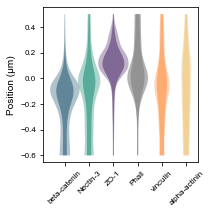

In [25]:



'''
Plotting of curves within 2 µm around the reference
'''
root_file = "D:\Le Bivic Lenne teams exp\\Donnees triees\\"


Phall_ZO1_TC7_load = root_file + "Actin related proteins\Phall ZO-1\TC7 14 days\AB\Intensity_measurement\Results_mean.txt"

#Phall_Ecad_TC7_load = root_file + "Actin related proteins\Phall Ecad\TC7 14 days\AB\Intensity_measurement\Results_mean.txt"
Phall_Ecad_TC7_load = root_file + r"Actin related proteins\Phall Ecad\TC7 14 days\AB\all samples\Results_mean_2.txt"

#Phall_beta_cat_TC7_load = root_file + "Actin related proteins\Phall beta-catenin\TC7 14 days\AB\Intensity_measurement\Results_mean.txt"
Phall_beta_cat_TC7_load = root_file + r"Actin related proteins\Phall beta-catenin\TC7 14 days\AB\all samples\Results_mean_2.txt"


#Phall_Nectin_TC7_load = root_file + "Actin related proteins\Phall Nectin-3\TC7 WT 14 days\AB\Intensity_measurement\Results_mean.txt"
Phall_Nectin_TC7_load = root_file + r"Actin related proteins\Phall Nectin-3\TC7 WT 14 days\AB\all samples\Results_mean_2.txt"

#subplot() command specifies numrows, numcols, fignum where fignum ranges from 1 to numrows*numcols. 
Phall_vinculin_TC7_load = root_file + r"Actin related proteins\Vinculin Phall\analysis all\Intensity_measurement\Results_mean.txt"

#Phall_Ecad_TC7_load = root_file + "Actin related proteins\Phall Ecad\TC7 14 days\AB\Intensity_measurement\Results_mean.txt"
Phall_alpha_actinin_TC7_load = root_file + r"Actin related proteins\Phall alpha-actinin\Intensity_measurement\Results_mean.txt"

#########

alpha = 0.06

# colors  E-cad    Nectin-3    ZO-1       
colors = ['#628699','#59ac9a','#816996','#FFAC73','#F2D197','#89cdaa',"black"]
actin_color = '#939393'
files_to_load_single_TC7 = [Phall_beta_cat_TC7_load,
                            Phall_Nectin_TC7_load,
                            Phall_ZO1_TC7_load,
                            Phall_vinculin_TC7_load,
                            Phall_alpha_actinin_TC7_load]

#Phall_MyoIIb_TC7_load,Phall_Arp3_TC7_load

###############################################
##### symmetric plots + std dev - TC7 #########
###############################################

beta = 0.08
fig, ax3 = plt.subplots(figsize=(6, 3))

first_point = 140
last_point = 251
shift = 200
position = np.arange((first_point-shift)*0.010, (last_point-shift)*0.010, 0.010)#evenly spaced positions from 0 to 2000 included

for k in range(0, 3):
        data_txt = files_to_load_single_TC7[k]
        Protein1_AB,Protein2_AB,variance_protein1_AB,variance_protein2_AB = np.loadtxt(data_txt, unpack=True)

        Protein_of_interest = Protein1_AB[first_point:last_point]/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))
        Protein_of_interest_std_dev = np.sqrt(variance_protein1_AB[first_point:last_point])/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))

        ax3.fill_betweenx(position, Protein_of_interest+beta*k, -Protein_of_interest+beta*k,facecolor=colors[k])
        ax3.fill_betweenx(position, Protein_of_interest+Protein_of_interest_std_dev+beta*k, -Protein_of_interest-Protein_of_interest_std_dev+beta*k,facecolor=colors[k],alpha=0.5)


data_txt = files_to_load_single_TC7[3]
Protein1_AB,Protein2_AB,variance_protein1_AB,variance_protein2_AB = np.loadtxt(data_txt, unpack=True)
Reference_protein = Protein2_AB[first_point:last_point]/(np.mean(Protein2_AB[first_point:last_point])*(last_point-1-first_point))
Reference_protein_std_dev = np.sqrt(variance_protein2_AB[first_point:last_point])/(np.mean(Protein2_AB[first_point:last_point])*(last_point-1-first_point))
k=3
ax3.fill_betweenx(position, Reference_protein+beta*k, -Reference_protein+beta*k,facecolor=actin_color) 
ax3.fill_betweenx(position,
                  Reference_protein+Reference_protein_std_dev+beta*k, -Reference_protein-Reference_protein_std_dev+beta*k,
                  facecolor=actin_color,alpha=0.7) 


                  
delta = 1
for k in range(3, len(files_to_load_single_TC7)):
        data_txt = files_to_load_single_TC7[k]
        Protein1_AB,Protein2_AB,variance_protein1_AB,variance_protein2_AB = np.loadtxt(data_txt, unpack=True)

        Protein_of_interest = Protein1_AB[first_point:last_point]/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))
        Protein_of_interest_std_dev = np.sqrt(variance_protein1_AB[first_point:last_point])/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))

        ax3.fill_betweenx(position, Protein_of_interest+beta*(k+delta), -Protein_of_interest+beta*(k+delta),facecolor=colors[k])
        ax3.fill_betweenx(position, Protein_of_interest+Protein_of_interest_std_dev+beta*(k+delta), -Protein_of_interest-Protein_of_interest_std_dev+beta*(k+delta),facecolor=colors[k],alpha=0.5)


#Proteins_y = ["Ecad","beta-catenin","alpha-catenin","Phall","Nectin-3","Afadin","Myosin-IIb","Arp3","ZO-1"]
Proteins_y = ["beta-catenin","Nectin-3","ZO-1","Phall","vinculin","alpha-actinin"]
ax3.set_xticks(np.arange(0,6*beta,beta))
ax3.set_xticklabels(Proteins_y)
plt.xticks(rotation = 45)


x0, x1 = ax3.get_xlim()
y0, y1 = ax3.get_ylim()
ax3.set_aspect(-1*(-x1+x0)/(y1-y0))

plt.ylabel(u'Position (\u03bcm)', fontname="Arial", fontsize=axis_font_size)
plt.tight_layout()

save_fig = r'C:\Users\mangeol\Desktop\Manuscript Zonula adherens and actin organization\PNAS Revision\figures\Figure S2\Phall vs vinculin alpha-actinin AB distribution TC7 14 days.pdf'
plt.savefig(save_fig,transparent=True, format = "pdf")

plt.show()




## 6 and 9 days WT TC7 cells
### currently issues with references - most likely have to repeat analysis

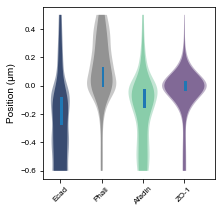

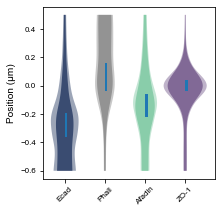

In [5]:
import glob
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
import matplotlib as mpl
import matplotlib.mlab as mlab
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

#ticker settings
majorLocator_x = MultipleLocator(0.01)
majorFormatter_x = FormatStrFormatter('%1.2f')
minorLocator_x = MultipleLocator(0.01)
majorLocator_y = MultipleLocator(1.5)
majorFormatter_y = FormatStrFormatter('%4.1f')
minorLocator_y = MultipleLocator(0.5)
#sets font type and size for tickers
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 8
axis_font_size = 10

#plt.close("all")

############################# index of maximum of 1D array
def max_arg(array):
    return [i for i, j in enumerate(array) if j == max(array)][0]
##########################################################
    
############################# index N of array such the area under the curve between index of max and N
#### is the fraction F of the total area under the curve from 0 to index of max
def left_arg(array,fraction):
    k=0
    maxk = max_arg(array)
    left = maxk-1
    integral = sum(array[0:maxk+1])
    while (sum(array[0:maxk-k]) > (1-fraction)*integral) and (maxk-k >= 0):
        left = maxk-k-1 
        k = k+1  

    return left
##########################################################
    
############################# index N of array such the area under the curve between index of max and N
#### is the fraction F of the total area under the curve from 0 to index of max
def right_arg(array,fraction):
    k=0
    maxk = max_arg(array)
    right = maxk+1
    integral = sum(array[maxk:len(array)])
    while sum(array[maxk+k:len(array)]) > (1-fraction)*integral and maxk+k < len(array):
        right = maxk+k 
        k = k+1  

    return right
##########################################################
     
############ Aim: find the region where proteins are most likely to be found with fraction
############ "probability"
def index_of_threshold_AB(array,probability,first_point,shift):
    min_arg = left_arg(array,probability)*0.01+(first_point-shift)*0.010
    max_arg = right_arg(array,probability)*0.01+(first_point-shift)*0.010
    return [min_arg,max_arg]
##########################################################


'''
Plotting of curves within 2 µm around the reference
'''

#subplot() command specifies numrows, numcols, fignum where fignum ranges from 1 to numrows*numcols. 
root_file = "D:\Le Bivic Lenne teams exp\Donnees triees\\"

Phall_ZO1_TC7_6days_load = root_file + "Actin related proteins\Phall ZO-1\TC7 6 days\AB\Intensity_measurement\Results_mean.txt"
Phall_ZO1_TC7_9days_load = root_file + "Actin related proteins\Phall ZO-1\TC7 9 days\Intensity_measurement\Results_mean.txt"

ZO1_afadin_TC7_6days_load = root_file + "Actin related proteins\Afadin ZO-1\TC7 6 days\Intensity_measurement\Results_mean.txt"
ZO1_afadin_TC7_9days_load = root_file + "Actin related proteins\Afadin ZO-1\TC7 9 days\Intensity_measurement\Results_mean.txt"

ZO1_Ecad_TC7_6days_load = root_file + "Polarity and other Proteins vs TJ\E-cad ZO-1\TC7 WT 6 days\Intensity_measurement\Results_mean.txt"
ZO1_Ecad_TC7_9days_load = root_file + "Polarity and other Proteins vs TJ\E-cad ZO-1\TC7 WT 9 days\Intensity_measurement\Results_mean.txt"

#########

alpha = 0.06

# colors
colors = ['#3a4c71','#939393','#89cdaa','#816996',"black"]
actin_color = '#939393'
files_to_load_single_TC7 = [ZO1_Ecad_TC7_6days_load, Phall_ZO1_TC7_6days_load, ZO1_afadin_TC7_6days_load, 
                            ZO1_Ecad_TC7_9days_load, Phall_ZO1_TC7_9days_load, ZO1_afadin_TC7_9days_load]

###############################################
#### symmetric plots + std dev - TC7 6 days ###
###############################################
patches = []
beta = 0.08
fig, ax3 = plt.subplots(figsize=(6, 3))

first_point = 140
last_point = 251
shift = 200
position = np.arange((first_point-shift)*0.010, (last_point-shift)*0.010, 0.010)#evenly spaced positions from 0 to 2000 included

probability = 0.3 #set the probability to find the region where a protein can be found

# get and calculate data to display
k=0
data_txt = files_to_load_single_TC7[k]
Protein1_AB,Protein2_AB,variance_protein1_AB,variance_protein2_AB = np.loadtxt(data_txt, unpack=True)

Protein_of_interest = Protein1_AB[first_point:last_point]/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))
Protein_of_interest_std_dev = np.sqrt(variance_protein1_AB[first_point:last_point])/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))

ax3.fill_betweenx(position, Protein_of_interest+beta*k, -Protein_of_interest+beta*k,facecolor=colors[k])
ax3.fill_betweenx(position, Protein_of_interest+Protein_of_interest_std_dev+beta*k, -Protein_of_interest-Protein_of_interest_std_dev+beta*k,facecolor=colors[k],alpha=0.5)

rect_index = index_of_threshold_AB(Protein_of_interest,probability,first_point,shift)
rect = mpatches.Rectangle([beta*k,rect_index[0]], 0.005, rect_index[1]-rect_index[0])
patches.append(rect)


k=1 #here I swap protein1&2
data_txt = files_to_load_single_TC7[k]
Protein2_AB,Protein1_AB,variance_protein2_AB,variance_protein1_AB = np.loadtxt(data_txt, unpack=True)

Protein_of_interest = Protein1_AB[first_point:last_point]/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))
Protein_of_interest_std_dev = np.sqrt(variance_protein1_AB[first_point:last_point])/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))

ax3.fill_betweenx(position, Protein_of_interest+beta*k, -Protein_of_interest+beta*k,facecolor=colors[k])
ax3.fill_betweenx(position, Protein_of_interest+Protein_of_interest_std_dev+beta*k, -Protein_of_interest-Protein_of_interest_std_dev+beta*k,facecolor=colors[k],alpha=0.5)

rect_index = index_of_threshold_AB(Protein_of_interest,probability,first_point,shift)
rect = mpatches.Rectangle([beta*k,rect_index[0]], 0.005, rect_index[1]-rect_index[0])
patches.append(rect)


k=2
data_txt = files_to_load_single_TC7[k]
Protein1_AB,Protein2_AB,variance_protein1_AB,variance_protein2_AB = np.loadtxt(data_txt, unpack=True)

Protein_of_interest = Protein1_AB[first_point:last_point]/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))
Protein_of_interest_std_dev = np.sqrt(variance_protein1_AB[first_point:last_point])/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))

ax3.fill_betweenx(position, Protein_of_interest+beta*k, -Protein_of_interest+beta*k,facecolor=colors[k])
ax3.fill_betweenx(position, Protein_of_interest+Protein_of_interest_std_dev+beta*k, -Protein_of_interest-Protein_of_interest_std_dev+beta*k,facecolor=colors[k],alpha=0.5)

rect_index = index_of_threshold_AB(Protein_of_interest,probability,first_point,shift)
rect = mpatches.Rectangle([beta*k,rect_index[0]], 0.005, rect_index[1]-rect_index[0])
patches.append(rect)


k=2 #here I swap protein1&2
data_txt = files_to_load_single_TC7[k]
Protein2_AB,Protein1_AB,variance_protein2_AB,variance_protein1_AB = np.loadtxt(data_txt, unpack=True)

Protein_of_interest = Protein1_AB[first_point:last_point]/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))
Protein_of_interest_std_dev = np.sqrt(variance_protein1_AB[first_point:last_point])/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))
k=3
ax3.fill_betweenx(position, Protein_of_interest+beta*k, -Protein_of_interest+beta*k,facecolor=colors[k])
ax3.fill_betweenx(position, Protein_of_interest+Protein_of_interest_std_dev+beta*k, -Protein_of_interest-Protein_of_interest_std_dev+beta*k,facecolor=colors[k],alpha=0.5)

rect_index = index_of_threshold_AB(Protein_of_interest,probability,first_point,shift)
rect = mpatches.Rectangle([beta*k,rect_index[0]], 0.005, rect_index[1]-rect_index[0])
patches.append(rect)


# set axes labels, ticks and aspect
Proteins_y = ["Ecad","Phall","Afadin","ZO-1"]
ax3.set_xticks(np.arange(0,4*beta,beta))
ax3.set_xticklabels(Proteins_y)
plt.xticks(rotation = 45)

collection = PatchCollection(patches)
ax3.add_collection(collection)

x0, x1 = ax3.get_xlim()
y0, y1 = ax3.get_ylim()
ax3.set_aspect(-1*(-x1+x0)/(y1-y0))

plt.ylabel(u'Position (\u03bcm)', fontname="Arial", fontsize=axis_font_size)
plt.tight_layout()

plt.show()


#save_fig = 'C:\Users\mangeol\Desktop\Manuscript Zonula adherens and actin organization\\data analysis\\Phall vs other proteins AB distribution TC7 6 days.pdf'
#plt.savefig(save_fig,transparent=True, format = "pdf")
#save_fig_png = 'C:\Users\mangeol\Desktop\Manuscript Zonula adherens and actin organization\\data analysis\\Phall vs other proteins AB distribution TC7 6 days.png'
#plt.savefig(save_fig_png,transparent=True, format = "png")

###############################################
#### symmetric plots + std dev - TC7 6 days ###
###############################################
patches = []
beta = 0.08
fig, ax3 = plt.subplots(figsize=(6, 3))

first_point = 140
last_point = 251
shift = 200
position = np.arange((first_point-shift)*0.010, (last_point-shift)*0.010, 0.010)#evenly spaced positions from 0 to 2000 included

a = 3

k=0
data_txt = files_to_load_single_TC7[k+a]
Protein1_AB,Protein2_AB,variance_protein1_AB,variance_protein2_AB = np.loadtxt(data_txt, unpack=True)

Protein_of_interest = Protein1_AB[first_point:last_point]/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))
Protein_of_interest_std_dev = np.sqrt(variance_protein1_AB[first_point:last_point])/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))

ax3.fill_betweenx(position, Protein_of_interest+beta*k, -Protein_of_interest+beta*k,facecolor=colors[k])
ax3.fill_betweenx(position, Protein_of_interest+Protein_of_interest_std_dev+beta*k, -Protein_of_interest-Protein_of_interest_std_dev+beta*k,facecolor=colors[k],alpha=0.5)

rect_index = index_of_threshold_AB(Protein_of_interest,probability,first_point,shift)
rect = mpatches.Rectangle([beta*k,rect_index[0]], 0.005, rect_index[1]-rect_index[0])
patches.append(rect)


k=1 #here I swap protein1&2
data_txt = files_to_load_single_TC7[k+a]
Protein2_AB,Protein1_AB,variance_protein2_AB,variance_protein1_AB = np.loadtxt(data_txt, unpack=True)

Protein_of_interest = Protein1_AB[first_point:last_point]/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))
Protein_of_interest_std_dev = np.sqrt(variance_protein1_AB[first_point:last_point])/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))

ax3.fill_betweenx(position, Protein_of_interest+beta*k, -Protein_of_interest+beta*k,facecolor=colors[k])
ax3.fill_betweenx(position, Protein_of_interest+Protein_of_interest_std_dev+beta*k, -Protein_of_interest-Protein_of_interest_std_dev+beta*k,facecolor=colors[k],alpha=0.5)

rect_index = index_of_threshold_AB(Protein_of_interest,probability,first_point,shift)
rect = mpatches.Rectangle([beta*k,rect_index[0]], 0.005, rect_index[1]-rect_index[0])
patches.append(rect)


k=2
data_txt = files_to_load_single_TC7[k+a]
Protein1_AB,Protein2_AB,variance_protein1_AB,variance_protein2_AB = np.loadtxt(data_txt, unpack=True)

Protein_of_interest = Protein1_AB[first_point:last_point]/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))
Protein_of_interest_std_dev = np.sqrt(variance_protein1_AB[first_point:last_point])/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))

ax3.fill_betweenx(position, Protein_of_interest+beta*k, -Protein_of_interest+beta*k,facecolor=colors[k])
ax3.fill_betweenx(position, Protein_of_interest+Protein_of_interest_std_dev+beta*k, -Protein_of_interest-Protein_of_interest_std_dev+beta*k,facecolor=colors[k],alpha=0.5)

rect_index = index_of_threshold_AB(Protein_of_interest,probability,first_point,shift)
rect = mpatches.Rectangle([beta*k,rect_index[0]], 0.005, rect_index[1]-rect_index[0])
patches.append(rect)


k=2 #here I swap protein1&2
data_txt = files_to_load_single_TC7[k+a]
Protein2_AB,Protein1_AB,variance_protein2_AB,variance_protein1_AB = np.loadtxt(data_txt, unpack=True)

Protein_of_interest = Protein1_AB[first_point:last_point]/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))
Protein_of_interest_std_dev = np.sqrt(variance_protein1_AB[first_point:last_point])/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))
k=3
ax3.fill_betweenx(position, Protein_of_interest+beta*k, -Protein_of_interest+beta*k,facecolor=colors[k])
ax3.fill_betweenx(position, Protein_of_interest+Protein_of_interest_std_dev+beta*k, -Protein_of_interest-Protein_of_interest_std_dev+beta*k,facecolor=colors[k],alpha=0.5)

rect_index = index_of_threshold_AB(Protein_of_interest,probability,first_point,shift)
rect = mpatches.Rectangle([beta*k,rect_index[0]], 0.005, rect_index[1]-rect_index[0])
patches.append(rect)


# set axes labels, ticks and aspect
Proteins_y = ["Ecad","Phall","Afadin","ZO-1"]
ax3.set_xticks(np.arange(0,4*beta,beta))
ax3.set_xticklabels(Proteins_y)
plt.xticks(rotation = 45)

collection = PatchCollection(patches)
ax3.add_collection(collection)

x0, x1 = ax3.get_xlim()
y0, y1 = ax3.get_ylim()
ax3.set_aspect(-1*(-x1+x0)/(y1-y0))

plt.ylabel(u'Position (\u03bcm)', fontname="Arial", fontsize=axis_font_size)
plt.tight_layout()

plt.show()


#save_fig = 'C:\Users\mangeol\Desktop\Manuscript Zonula adherens and actin organization\\data analysis\\Phall vs other proteins AB distribution TC7 9 days.pdf'
#plt.savefig(save_fig,transparent=True, format = "pdf")
#save_fig_png = 'C:\Users\mangeol\Desktop\Manuscript Zonula adherens and actin organization\\data analysis\\Phall vs other proteins AB distribution TC7 9 days.png'
#plt.savefig(save_fig_png,transparent=True, format = "png")


### all in one graph

meta NOT subset; don't know how to subset; dropped


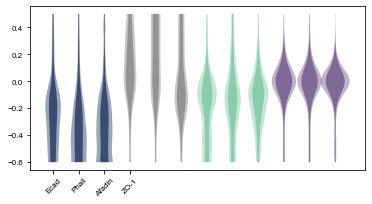

meta NOT subset; don't know how to subset; dropped


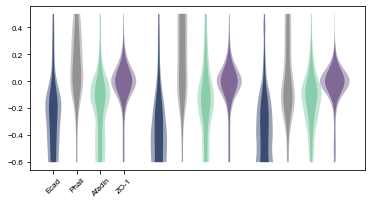

In [70]:
root_file = "D:\Le Bivic Lenne teams exp\Donnees triees\\"

Phall_ZO1_TC7_6days_load = root_file + r"Actin related proteins\Phall ZO-1\TC7 6 days\AB\all samples\Results_mean_2.txt"
Phall_ZO1_TC7_9days_load = root_file + r"Actin related proteins\Phall ZO-1\TC7 9 days\all samples\Results_mean_2.txt"
Phall_ZO1_TC7_14days_load = root_file + "Actin related proteins\Phall ZO-1\TC7 14 days\AB\\analysis with ZO-1 ref - max of ZO-1\Intensity_measurement\Results_mean_2.txt"

ZO1_afadin_TC7_6days_load = root_file + r"Actin related proteins\Afadin ZO-1\TC7 6 days\all samples\Results_mean_2.txt"
ZO1_afadin_TC7_9days_load = root_file + r"Actin related proteins\Afadin ZO-1\TC7 9 days\all samples\Results_mean_2.txt"
ZO1_afadin_TC7_14days_load = root_file + r"Actin related proteins\Afadin ZO-1\TC7 14 days\all samples\Results_mean_2.txt"

ZO1_Ecad_TC7_6days_load = root_file + r"Polarity and other Proteins vs TJ\E-cad ZO-1\TC7 WT 6 days\all samples\Results_mean_2.txt"
ZO1_Ecad_TC7_9days_load = root_file + r"Polarity and other Proteins vs TJ\E-cad ZO-1\TC7 WT 9 days\all samples\Results_mean_2.txt"
ZO1_Ecad_TC7_14days_load = root_file + "Polarity and other Proteins vs TJ\E-cad ZO-1\TC7 WT - 14 days\AB\All reference max ZO-1\Intensity_measurement\Results_mean_2.txt"


colors = ['#3a4c71','#939393','#89cdaa','#816996',"black"]
actin_color = '#939393'
files_to_load_single_TC7 = [ZO1_Ecad_TC7_6days_load, ZO1_Ecad_TC7_9days_load, ZO1_Ecad_TC7_14days_load,
                            Phall_ZO1_TC7_6days_load, Phall_ZO1_TC7_9days_load, Phall_ZO1_TC7_14days_load,
                            ZO1_afadin_TC7_6days_load, ZO1_afadin_TC7_9days_load, ZO1_afadin_TC7_14days_load]

beta = 0.11
fig, ax3 = plt.subplots(figsize=(6, 3))

first_point = 140
last_point = 251
shift = 200
position = np.arange((first_point-shift)*0.010, (last_point-shift)*0.010, 0.010)#evenly spaced positions from 0 to 2000 included


for k in range(9):
    data_txt = files_to_load_single_TC7[k]
    Protein1_AB,Protein2_AB,variance_protein1_AB,variance_protein2_AB = np.loadtxt(data_txt, unpack=True)

    Protein_of_interest = Protein1_AB[first_point:last_point]/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))
    Protein_of_interest_std_dev = np.sqrt(variance_protein1_AB[first_point:last_point])/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))

    ax3.fill_betweenx(position, Protein_of_interest+beta*k, -Protein_of_interest+beta*k,facecolor=colors[k//3])
    ax3.fill_betweenx(position, Protein_of_interest+Protein_of_interest_std_dev+beta*k, -Protein_of_interest-Protein_of_interest_std_dev+beta*k,facecolor=colors[k//3],alpha=0.5)
    
files_to_load_single_TC7 = [ZO1_afadin_TC7_6days_load, ZO1_afadin_TC7_9days_load, ZO1_afadin_TC7_14days_load]

for i in range(3):
    
    k = k + 1
    data_txt = files_to_load_single_TC7[i]
    Protein1_AB,Protein2_AB,variance_protein1_AB,variance_protein2_AB = np.loadtxt(data_txt, unpack=True)

    Protein_of_interest = Protein2_AB[first_point:last_point]/(np.mean(Protein2_AB[first_point:last_point])*(last_point-1-first_point))
    Protein_of_interest_std_dev = np.sqrt(variance_protein2_AB[first_point:last_point])/(np.mean(Protein2_AB[first_point:last_point])*(last_point-1-first_point))

    ax3.fill_betweenx(position, Protein_of_interest+beta*k, -Protein_of_interest+beta*k,facecolor="#816996")
    ax3.fill_betweenx(position, Protein_of_interest+Protein_of_interest_std_dev+beta*k, -Protein_of_interest-Protein_of_interest_std_dev+beta*k,facecolor="#816996",alpha=0.5)

    
Proteins_y = ["Ecad","Phall","Afadin","ZO-1"]
ax3.set_xticks(np.arange(0,4*beta,beta))
ax3.set_xticklabels(Proteins_y)
plt.xticks(rotation = 45)

save_fig = r'C:\Users\mangeol\Desktop\Manuscript Zonula adherens and actin organization\figures\Resubmission\Figure 2\Phall vs other proteins AB distribution TC7 6-9-14 days.pdf'
plt.savefig(save_fig,transparent=True, format = "pdf")

plt.show()




colors = ['#3a4c71','#939393','#89cdaa','#816996',"black"]
actin_color = '#939393'
files_to_load_single_TC7 = [ZO1_Ecad_TC7_6days_load, Phall_ZO1_TC7_6days_load, ZO1_afadin_TC7_6days_load,
                            ZO1_Ecad_TC7_9days_load, Phall_ZO1_TC7_9days_load, ZO1_afadin_TC7_9days_load,
                            ZO1_Ecad_TC7_14days_load, Phall_ZO1_TC7_14days_load, ZO1_afadin_TC7_14days_load]

beta = 0.098
fig, ax3 = plt.subplots(figsize=(6, 3))

first_point = 140
last_point = 251
shift = 200
position = np.arange((first_point-shift)*0.010, (last_point-shift)*0.010, 0.010)#evenly spaced positions from 0 to 2000 included

k = 0
for i in range(9):
    data_txt = files_to_load_single_TC7[i]
    Protein1_AB,Protein2_AB,variance_protein1_AB,variance_protein2_AB = np.loadtxt(data_txt, unpack=True)

     
    if i%3 == 2:
        Protein_of_interest = Protein1_AB[first_point:last_point]/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))
        Protein_of_interest_std_dev = np.sqrt(variance_protein1_AB[first_point:last_point])/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))

        ax3.fill_betweenx(position, Protein_of_interest+beta*k, -Protein_of_interest+beta*k,facecolor=colors[i%3])
        ax3.fill_betweenx(position, Protein_of_interest+Protein_of_interest_std_dev+beta*k, -Protein_of_interest-Protein_of_interest_std_dev+beta*k,facecolor=colors[i%3],alpha=0.5)
        
        Protein_of_interest = Protein2_AB[first_point:last_point]/(np.mean(Protein2_AB[first_point:last_point])*(last_point-1-first_point))
        Protein_of_interest_std_dev = np.sqrt(variance_protein2_AB[first_point:last_point])/(np.mean(Protein2_AB[first_point:last_point])*(last_point-1-first_point))
        k += 1
        ax3.fill_betweenx(position, Protein_of_interest+beta*(k), -Protein_of_interest+beta*(k),facecolor='#816996')
        ax3.fill_betweenx(position, Protein_of_interest+Protein_of_interest_std_dev+beta*(k), -Protein_of_interest-Protein_of_interest_std_dev+beta*(k),facecolor='#816996',alpha=0.5)
        k += 0.5
    else:
        Protein_of_interest = Protein1_AB[first_point:last_point]/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))
        Protein_of_interest_std_dev = np.sqrt(variance_protein1_AB[first_point:last_point])/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))

        ax3.fill_betweenx(position, Protein_of_interest+beta*k, -Protein_of_interest+beta*k,facecolor=colors[i%3])
        ax3.fill_betweenx(position, Protein_of_interest+Protein_of_interest_std_dev+beta*k, -Protein_of_interest-Protein_of_interest_std_dev+beta*k,facecolor=colors[i%3],alpha=0.5)

    k += 1
        
    
files_to_load_single_TC7 = [ZO1_afadin_TC7_6days_load, ZO1_afadin_TC7_9days_load, ZO1_afadin_TC7_14days_load]
    
Proteins_y = ["Ecad","Phall","Afadin","ZO-1"]
ax3.set_xticks(np.arange(0,4*beta,beta))
ax3.set_xticklabels(Proteins_y)
plt.xticks(rotation = 45)

save_fig = r'C:\Users\mangeol\Desktop\Manuscript Zonula adherens and actin organization\figures\Resubmission\Figure 2\Phall vs other proteins AB distribution TC7 6-9-14 days - grouped.pdf'
plt.savefig(save_fig,transparent=True, format = "pdf")

plt.show()




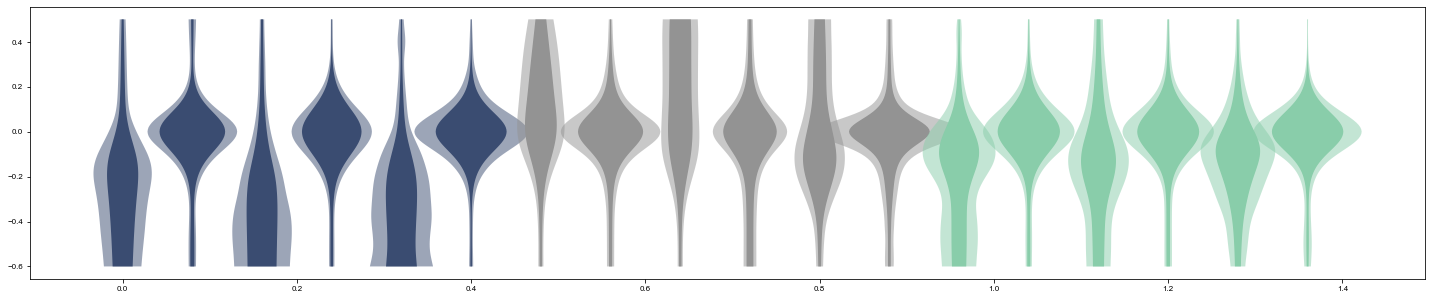

In [38]:
root_file = "D:\Le Bivic Lenne teams exp\Donnees triees\\"

Phall_ZO1_TC7_6days_load = root_file + r"Actin related proteins\Phall ZO-1\TC7 6 days\AB\all samples\Results_mean_2.txt"
Phall_ZO1_TC7_9days_load = root_file + r"Actin related proteins\Phall ZO-1\TC7 9 days\all samples\Results_mean_2.txt"
Phall_ZO1_TC7_14days_load = root_file + "Actin related proteins\Phall ZO-1\TC7 14 days\AB\\analysis with ZO-1 ref - max of ZO-1\Intensity_measurement\Results_mean_2.txt"

ZO1_afadin_TC7_6days_load = root_file + r"Actin related proteins\Afadin ZO-1\TC7 6 days\all samples\Results_mean_2.txt"
ZO1_afadin_TC7_9days_load = root_file + r"Actin related proteins\Afadin ZO-1\TC7 9 days\all samples\Results_mean_2.txt"
ZO1_afadin_TC7_14days_load = root_file + r"Actin related proteins\Afadin ZO-1\TC7 14 days\all samples\Results_mean_2.txt"

ZO1_Ecad_TC7_6days_load = root_file + r"Polarity and other Proteins vs TJ\E-cad ZO-1\TC7 WT 6 days\all samples\Results_mean_2.txt"
ZO1_Ecad_TC7_9days_load = root_file + r"Polarity and other Proteins vs TJ\E-cad ZO-1\TC7 WT 9 days\all samples\Results_mean_2.txt"
ZO1_Ecad_TC7_14days_load = root_file + "Polarity and other Proteins vs TJ\E-cad ZO-1\TC7 WT - 14 days\AB\All reference max ZO-1\Intensity_measurement\Results_mean_2.txt"

colors = ['#3a4c71','#939393','#89cdaa','#816996',"black"]
actin_color = '#939393'
files_to_load_single_TC7 = [ZO1_Ecad_TC7_6days_load, ZO1_Ecad_TC7_9days_load, ZO1_Ecad_TC7_14days_load,
                            Phall_ZO1_TC7_6days_load, Phall_ZO1_TC7_9days_load, Phall_ZO1_TC7_14days_load,
                            ZO1_afadin_TC7_6days_load, ZO1_afadin_TC7_9days_load, ZO1_afadin_TC7_14days_load]

beta = 0.08
fig, ax3 = plt.subplots(figsize=(25, 5))

first_point = 140
last_point = 251
shift = 200
position = np.arange((first_point-shift)*0.010, (last_point-shift)*0.010, 0.010)#evenly spaced positions from 0 to 2000 included


for k in range(9):
    data_txt = files_to_load_single_TC7[k]
    Protein1_AB,Protein2_AB,variance_protein1_AB,variance_protein2_AB = np.loadtxt(data_txt, unpack=True)

    Protein_of_interest = Protein1_AB[first_point:last_point]/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))
    Protein_of_interest_std_dev = np.sqrt(variance_protein1_AB[first_point:last_point])/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))
    ref_Protein = Protein2_AB[first_point:last_point]/(np.mean(Protein2_AB[first_point:last_point])*(last_point-1-first_point))
    ref_Protein_std_dev = np.sqrt(variance_protein2_AB[first_point:last_point])/(np.mean(Protein2_AB[first_point:last_point])*(last_point-1-first_point))


    ax3.fill_betweenx(position, Protein_of_interest+beta*(2*k), -Protein_of_interest+beta*2*k,facecolor=colors[k//3])
    ax3.fill_betweenx(position, Protein_of_interest+Protein_of_interest_std_dev+beta*2*k,
                      -Protein_of_interest-Protein_of_interest_std_dev+beta*2*k,facecolor=colors[k//3],alpha=0.5)

    ax3.fill_betweenx(position, ref_Protein+beta*(2*k+1), -ref_Protein+beta*(2*k+1),facecolor=colors[k//3])
    ax3.fill_betweenx(position, ref_Protein+ref_Protein_std_dev+beta*(2*k+1),
                      -ref_Protein-ref_Protein_std_dev+beta*(2*k+1),facecolor=colors[k//3],alpha=0.5)
plt.show()

## Actin planar organization in Afadin KO, WT and KO/WT interfaces

meta NOT subset; don't know how to subset; dropped


KO/KO-channel2   WT/WT-channel1   KO/WT-channel2
Because of the asymetry, I used the apico-basal analysis, with WT cells always on the left-hand side of lines drawn. Lower values of positions are hence toward WT.


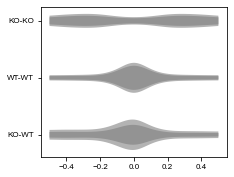

In [34]:
root_KO_AF6 = r'D:\Le Bivic Lenne teams exp\Donnees triees\KO Afadin\Planar\Phall Afadine - TC7 14 days\\'

load_KO_KO = root_KO_AF6 + '\KO-KO\Intensity_measurement\Results_mean_2.txt'
load_WT_WT = root_KO_AF6 + '\WT-WT\Intensity_measurement\Results_mean_2.txt'
load_KO_WT = root_KO_AF6 + '\KO-WT\Intensity_measurement\Results_mean_2.txt'

position = np.arange(-0.5, 0.510, 0.010)#evenly spaced positions from -500 to 500 nm included
first_point = 150
last_point = 251 #very last point is not included in python

######

#Crumbs_human_savefig_png = 'C:\Users\mangeol\Desktop\\Manuscript polarity mapping\Data analysis\Average positions from STED data\\Crumbs3A ZO-1 human planar mean.png'

######

alpha = 0.06
#files_to_load_single_human = [Crumbs_human_load,PALS1_human_load,PATJ_human_load,PKC_human_load,PAR6B_human_load,PAR3_human_load,ZO1_human_load,Ecad_human_load]
colors = ['violet','magenta','purple','skyblue','dodgerblue','royalblue']
files_to_load = [load_KO_KO, load_WT_WT, load_KO_WT]

color_actin = '#939393'

Proteins_y = ["KO-KO", "WT-WT", "KO-WT"]

beta = 0.14
fig, ax4 = plt.subplots(figsize=(3.2, 2.5))
#fig, ax4 = plt.subplots(figsize=(16, 12.5))

for k in range(0, len(files_to_load)):

    data_txt = files_to_load[k]
    Prot1 , Prot2, variance_Prot1,variance_Prot2 = loadtxt(data_txt, unpack=True)
    if k == 2:
        #rename for generic use
        Protein_of_interest = Prot1[first_point:last_point]/(np.mean(Prot1[first_point:last_point])*(last_point-1-first_point))
        Protein_of_interest_std_dev = sqrt(variance_Prot1[first_point:last_point])/(np.mean(Prot1[first_point:last_point])*(last_point-1-first_point))

        #plt.plot(Protein_of_interest+beta*k,position, colors[k])
        ax4.fill_between(position, Protein_of_interest-beta*k, -Protein_of_interest-beta*k,facecolor=color_actin)
        ax4.fill_between(position, Protein_of_interest+Protein_of_interest_std_dev-beta*k, -Protein_of_interest-Protein_of_interest_std_dev-beta*k,facecolor=color_actin,alpha=0.7)
    else:
        Protein_of_interest = Prot2[first_point:last_point]/(np.mean(Prot2[first_point:last_point])*(last_point-1-first_point))
        Protein_of_interest_std_dev = sqrt(variance_Prot2[first_point:last_point])/(np.mean(Prot2[first_point:last_point])*(last_point-1-first_point))

        #plt.plot(Protein_of_interest+beta*k,position, colors[k])
        ax4.fill_between(position, Protein_of_interest-beta*k, -Protein_of_interest-beta*k,facecolor=color_actin)
        ax4.fill_between(position, Protein_of_interest+Protein_of_interest_std_dev-beta*k, -Protein_of_interest-Protein_of_interest_std_dev-beta*k,facecolor=color_actin,alpha=0.7)
plt.tight_layout()

ax4.set_yticks(np.arange(0,-len(Proteins_y)*beta,-beta))
ax4.set_yticklabels(Proteins_y)

save_fig = r'C:\Users\mangeol\Desktop\Manuscript Zonula adherens and actin organization\figures\Resubmission\Actin planar WT KO.pdf'
plt.savefig(save_fig,transparent=True, format = "pdf")
print("KO/KO-channel2   WT/WT-channel1   KO/WT-channel2")

print("Because of the asymetry, I used the apico-basal analysis, with WT cells always on the left-hand side of lines drawn. Lower values of positions are hence toward WT.")

## ZO-1 vs Ecad and Phall in KO Afadin 35A10

meta NOT subset; don't know how to subset; dropped


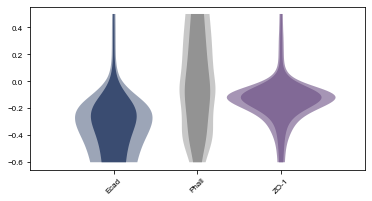

In [35]:
root_KO_AF6 = r'D:\Le Bivic Lenne teams exp\Donnees triees\KO Afadin\AB\\'

load_ZO1_Ecad = root_KO_AF6 + '\E-cad ZO-1\intensities all samples\Results_mean_2.txt'
load_ZO1_Phall = root_KO_AF6 + '\Phall ZO-1\sample 2 and 3 - intensities\Results_mean_2.txt'

alpha = 0.06

# colors  Phall     ZO-1             Phall   Ecad
Ecad_color = '#3a4c71'
ZO1_color = '#816996'#'#628699'
actin_color = '#939393'

colors = [Ecad_color, actin_color]
files_to_load_single_TC7 = [load_ZO1_Ecad, load_ZO1_Phall]


###############################################
##### symmetric plots + std dev - TC7 #########
###############################################

beta = 0.08
fig, ax3 = plt.subplots(figsize=(6, 3))

# positions
first_point = 140
last_point = 251
shift = 200
position = np.arange((first_point-shift)*0.010, (last_point-shift)*0.010, 0.010)#evenly spaced positions from 0 to 2000 included

for k in range(0, 2):
        data_txt = files_to_load_single_TC7[k]
        Protein1_AB,Protein2_AB,variance_protein1_AB,variance_protein2_AB = np.loadtxt(data_txt, unpack=True)

        Protein_of_interest = Protein1_AB[first_point:last_point]/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))
        Protein_of_interest_std_dev = np.sqrt(variance_protein1_AB[first_point:last_point])/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))

        ax3.fill_betweenx(position, Protein_of_interest+beta*k, -Protein_of_interest+beta*k,facecolor=colors[k])
        ax3.fill_betweenx(position, Protein_of_interest+Protein_of_interest_std_dev+beta*k, -Protein_of_interest-Protein_of_interest_std_dev+beta*k,facecolor=colors[k],alpha=0.5)


data_txt = files_to_load_single_TC7[1]
Protein1_AB,Protein2_AB,variance_protein1_AB,variance_protein2_AB = np.loadtxt(data_txt, unpack=True)
Reference_protein = Protein2_AB[first_point:last_point]/(np.mean(Protein2_AB[first_point:last_point])*(last_point-1-first_point))
Reference_protein_std_dev = np.sqrt(variance_protein2_AB[first_point:last_point])/(np.mean(Protein2_AB[first_point:last_point])*(last_point-1-first_point))
k=2
ax3.fill_betweenx(position, Reference_protein+beta*k, -Reference_protein+beta*k,facecolor=ZO1_color,) 
ax3.fill_betweenx(position, Reference_protein+Reference_protein_std_dev+beta*k, -Reference_protein-Reference_protein_std_dev+beta*k,facecolor=ZO1_color,alpha=0.7) 

Proteins_y = ["Ecad","Phall", "ZO-1"]
ax3.set_xticks(np.arange(0,3*beta,beta))
ax3.set_xlim(-beta, 3*beta)
ax3.set_xticklabels(Proteins_y)
plt.xticks(rotation = 45)

save_fig = r'C:\Users\mangeol\Desktop\Manuscript Zonula adherens and actin organization\figures\Resubmission\KO Afadine AB.pdf'
plt.savefig(save_fig,transparent=True, format = "pdf")

## ZO-1 vs Ecad, Phall and Nectin-3 in KO Afadin 35A10

meta NOT subset; don't know how to subset; dropped


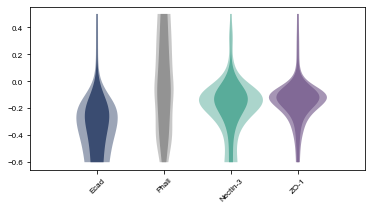

In [3]:
root_KO_AF6 = r'D:\Le Bivic Lenne teams exp\Donnees triees\KO Afadin\AB\\'

load_ZO1_Ecad = root_KO_AF6 + '\E-cad ZO-1\intensities all samples\Results_mean_2.txt'
load_ZO1_Phall = root_KO_AF6 + '\Phall ZO-1\sample 2 and 3 - intensities\Results_mean_2.txt'
load_ZO1_Nectin3 = root_KO_AF6 + r'\Nectin-3 ZO-1\all\Results_mean_2.txt'

alpha = 0.06

# colors  Phall     ZO-1             Phall   Ecad
Ecad_color = '#3a4c71'
ZO1_color = '#816996'#'#628699'
actin_color = '#939393'
Nectin3_color = '#59ac9a'

colors = [Ecad_color, actin_color, Nectin3_color]
files_to_load_single_TC7 = [load_ZO1_Ecad, load_ZO1_Phall, load_ZO1_Nectin3]


###############################################
##### symmetric plots + std dev - TC7 #########
###############################################

beta = 0.12
fig, ax3 = plt.subplots(figsize=(6, 3))

# positions
first_point = 140
last_point = 251
shift = 200
position = np.arange((first_point-shift)*0.010, (last_point-shift)*0.010, 0.010)#evenly spaced positions from 0 to 2000 included

for k in range(0, 3):
        data_txt = files_to_load_single_TC7[k]
        Protein1_AB,Protein2_AB,variance_protein1_AB,variance_protein2_AB = np.loadtxt(data_txt, unpack=True)

        Protein_of_interest = Protein1_AB[first_point:last_point]/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))
        Protein_of_interest_std_dev = np.sqrt(variance_protein1_AB[first_point:last_point])/(np.mean(Protein1_AB[first_point:last_point])*(last_point-1-first_point))

        ax3.fill_betweenx(position, Protein_of_interest+beta*k, -Protein_of_interest+beta*k,facecolor=colors[k])
        ax3.fill_betweenx(position, Protein_of_interest+Protein_of_interest_std_dev+beta*k, -Protein_of_interest-Protein_of_interest_std_dev+beta*k,facecolor=colors[k],alpha=0.5)


data_txt = files_to_load_single_TC7[1]
Protein1_AB,Protein2_AB,variance_protein1_AB,variance_protein2_AB = np.loadtxt(data_txt, unpack=True)
Reference_protein = Protein2_AB[first_point:last_point]/(np.mean(Protein2_AB[first_point:last_point])*(last_point-1-first_point))
Reference_protein_std_dev = np.sqrt(variance_protein2_AB[first_point:last_point])/(np.mean(Protein2_AB[first_point:last_point])*(last_point-1-first_point))
k=3
ax3.fill_betweenx(position, Reference_protein+beta*k, -Reference_protein+beta*k,facecolor=ZO1_color,) 
ax3.fill_betweenx(position, Reference_protein+Reference_protein_std_dev+beta*k, -Reference_protein-Reference_protein_std_dev+beta*k,facecolor=ZO1_color,alpha=0.7) 

Proteins_y = ["Ecad","Phall", "Nectin-3", "ZO-1"]
ax3.set_xticks(np.arange(0,4*beta,beta))
ax3.set_xlim(-beta, 4*beta)
ax3.set_xticklabels(Proteins_y)
plt.xticks(rotation = 45)

save_fig = r'C:\Users\mangeol\Desktop\Manuscript Zonula adherens and actin organization\figures\Resubmission\KO Afadine AB.pdf'
plt.savefig(save_fig,transparent=True, format = "pdf")